In [6]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import matplotlib.pyplot as plt

# Examen Final

#### Nombre: Valeria Yesquén 
#### Código: 20202239

## 1. (3 puntos) Instrumental Variables (IV)

Suponga que estamos interesados en estudiar la relación entre educación (X) y el nivel de ingresos (Y).

Un investigador propone utilizar como variable instrumental (Z) el número de horas que una persona utilizó para ver televisión cuando era niño.

#### - Identifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.

Las variables instrumentales suelen ser usadas para poder explicar mejor las posibles correlaciones observadas entre las variables, que este caso son la educación (X: tratamiento) y el nivel de ingresos (Y). 

Entonces, para implementar un enfoque así, es necesario observar y contar con dos supuestos. El primero es el de "Relevancia", el cual permite establecer con seguridad la existencia de una relación entre el tratamiento (X) y el instrumento (Z), pues implica que existe una parte de $X$ que puede ser explicada por Z. Esto resulta importante, porque de lo contrario, el uso de la variable instrumental no funcionaría. Además, de esa manera, se busca evitar endogeneidades. Por lo tanto, este primer supuesto observa y se asefura de ver qué tan relevante y fuerte resulta la relación entre $X$ y $Z$, pues esto permite que la estimación varie o salte menos de una muestra a otra. En consecuencia, teniendo en cuenta el caso, se debe observar la relevancia y fuerza de la relación que existe entre el "número de horas que una persona utilizó para ver televisión cuando era niño" (Z) y la "educación" (X). En ese sentido, se podría decir que sí existe una relación entre ambas variables, teniendo en cuenta que entre más horas se dediquen a ver televisión, menor tiempo tendrán para estudiar y viceversa. En otras palabras, la educación puede ser afectada por el número de horas que una persona utilizó para ver televisión cuando era niño.  

El segundo supuesto necesario para implementar un enfoque de IV, es el de "Validez". Este implica que cualquier ruta existente entre la variable instrumental (Z) y el resultado (Y), debe pasar necesariamente por el tratamiento (X). Además, implica que se debe ser capaz de controlar todos los caminos alternativos, o "back doors", que se puedan presentrar entre la variable Z y el resultado Y, incluyendo y centrándose únicamente en la ruta Z → X. 

#### - Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones

Para determinar y encontrar el efecto causal en el escenario, es necesario, primero construir una base de datos que contengan la información respectiva, acerca de las variables a considerar, que son la educación, los ingresos y el número de horas que una persona utilizó para ver televisión cuando era niño.

En base a ello, primero se podrían elaborar histogramas para ver cuán signitificativo es impacto que tiene la variable instrumental en el índice educativo de las personas. De esa manera, se podría observar, en un primer momento, si existe una relación entre ambas variables. Este mismo procedimiento podría aplicarse para el nivel de ingresos, para así observar, de forma gráfica, si es que existe un aumento o disminución de los mismos, dependiendo del número de horas que las personas invirtieron en ver televisión cuando eran niños.

Finalmente, para comprobar los datos gráfico, se podría construir una regresión lineal. Primero, con la variable "Ingresos" y "Educación", para así ver los resultados y el nivel de causalidad que el modelo podría arrogar. Posteriormente, se podría construir un segundo modelo de regresión lineal, en el que se emplee la variable instrumental, en este caso, el número de horas que una persona utilizó para ver televisión cuando era niño. De esa manera, luego se podrían comparar los resultados y concluir si efectivamente, el empleo de dicha variable instrumental, permite explicar mejor la relación de causalidad entre los ingresos (Y) y la educación (X). 

#### - ¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación.

El efecto de la educación sobre el nivel de ingresos, se espera que sea positivo, es decir, que a mayor educación alcanzada, mejores serán los ingresos percibidos. Sin embargo, podría ocurrir que existan casos en los que dicha causalidad no sean tan explicíta o presente ciertas variaciones. En ese sentido, la variable instrumental, permitiría explicar por qué, a pesar de que dos personas tienen un mismo nivel de educación alcanza, probablemente perciban distintos niveles de ingresos. La variable educación, efectivamente explicaría el nivel de ingresos percibidos por las personas, pero ya no solo depende del nivel de educación alcanzado, sino también de qué tan dedicado fue una persona a sus estudios y cuánto aprendió. Estos dos últimos criterios, podrían estar definidos por la variable instrumental, por lo tanto, la variable educación variará de acuerdo al número de horas que una persona invirtió viendo televisión cuando era niña, y esto tendría un efecto directo en el nivel de ingresos. Por lo tanto, se podría argumentar, que efectivamente, la educación tendría un efecto causal sobre el nivel de ingresos, y dicho efecto se entiende mejor, con ayuda de variables instrumentales, como la empleada, que explica las variaciones presentadas entre las personas respecto a su educación. 

## 2. (3 puntos) Regression Discontinuity Design (RDD)

Supongamos que estamos estudiando la eficacia de un programa de becas creado por el gobierno Peruano sobre las notas de los alumnos al final del primer semestre en la universidad. PRONABEC ha decidido que entregará becas a aquellos postulantes que tengan un promedio superior durante la secundaria igual a 16.

#### - Identifique todos los elementos necesarios para implementar un RDD en este ejemplo.

Para implementar un RDD es necesario tener en cuenta los siguientes elementos: 

- Variable de ejecución  $(X)$: Esta determina si la unidad recibe o no el tratamiento.

- Cutoff o Punto de corte $(c_0)$: Este es el límite de la varible, en donde se determina si la unidad recibe o no el tratamiento. Aquellas unidades que superen el corte, recibirán el tratamiento, mientras que, aquellas que no, no lo hará. 

- Ancho de banda $(h)$: Este es la cantidad de área alrededor del límite que se desea comparar. 

- Tratamiento $(D)$: Representación de si la unidad recibió o no el tratemiento. 1 es para la recepción y 0 para la no recepción del tratamiento. 

#### - Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.

En este caso, se debe tomar en cuenta el hecho de que la variable de ejecución (X) es una variable continua, la cual asigna las unidades que recibirán o no el tratamiento. En ese sentido dicha asignación, como se mencionó en la descripción de los elementos, será realizada siguiendo el Cutoff, lo cual implica que aquellas unidades que logren un puntaje que supere dicho Cutoff, serán las que recibirán el tratamiento, mientras que, las que no consigan superar dicho corte, no lo recibirán. Entonces, en este caso, la asignación de las becas serán en base al promedio alcanzado en secundaria. Por lo tanto, se puede decir que el punto de corte, está determinado por dicho promedio, el cual tiene por límite 16. Entonces, aquellos estudiantes que hayan logrado obtener un promedio superior a 16, serán los elegidos para recibir el tratamiento, que en este caso, implica el otorgamiento de una Beca. Además, la variable en ejecución, sería aquella identificada como la nota. En ese sentido, una vez que se ha asignado los grupos de tratamiento, es decir, aquellos que reciben las becas, es que, posteriormente, se podrá identificar cuán eficacez resultaron las becas para aumentar el rendimiento académico de los estudiantes. 

#### - ¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación.

En este caso, de manera intuitiva, se podría identificar un efecto positivo sobre el rendimiento de los estudiantes. Esto porque, la asignación de una beca obliga al estudiante a estudiar y mantener un rendimiento promedio, para así poder mantenerla. En ese sentido, no creo que se trate realmente de una relación causal, pues la principal causa directa de un mayor rendimiento es el mismo hecho de dedicar un mayor esfuerzo al estudio. Entonces, el mayor rendimiento, sería producto de una mayor dedicación y estudio. Sin embargo, no se puede negar la relación que tiene la asignación de las becas, con el rendimiento académico, por eso, se hablaría de una correlación, principalmente, pues la asignación de las becas, principalmente, incentiva a los estudiantes a dedicarse más en sus estudios universitarios, y los condiciona a mantener un rendimiento promedio para poder seguir accediento a los beneficios de la beca. 

## 3. (3 puntos) Difference in Difference (DiD)

#### - Identifique todos los elementos necesarios para implementar un DiD en este ejemplo.

Para implementar esta metodología no se necesita que los grupos de tratamiento y control sean similares, a diferencia del experimento aleatorio. Por el contrario, la principal condición necesaria resulta ser el "supuesto de tendencia paralelas", el cual asume el hecho de que, en ausencia de un tratamiento, los grupos hubieran tomado las mismas decisiones o rumbos, llevandolos a los mismos resultados. 

#### - Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.

En este caso, considerando las concepciones previas, se podría decir que el grupo de tratamiento sería Lima, mientras que, el grupo de control Puno. Este tratamiento implicaría la experimentación de una afluencia significativa de inmigrantes durante el periodo de 2018. Entonces, teniendo en cuenta el supuesto de tendencias paralelas, se podría decir que, de no haber experimentado una fuerte afluencia inmigratoria en el 2018, el impacto en la tasa de empleo, hubiera sido similar en ambas regiones, tanto en Puno como en Lima. Sin embargo, como Lima experimentó un proceso de inmigración, su tasa de empleo sería diferente de la percibida por Puno. Sin embargo, no habría mayores factores que hubieran generado dicha diferencia. 

#### ¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .

En este caso, se podría intuir, que el efecto de la inmigración, podría tener un impacto positivo en la tasa de empleo, pues el hecho de que las personas consideren migrar hacia otra región, implica que no encuentran oportunidades laborales en sus lugares de residencia. Por lo tanto, la inmigrar, la región que recibe dichos inmigrates, comenzaría a tener una mayor tasa de empleo, mientras que la zona de la que emigran, una tasa menor. En ese sentido, se podría decir que existe un resultado causal entre dicha relación, pues la migración tendría un efecto directo en la tasa de empleo, considerando que mientras más inmigración se hubiera percibido, dicha tasa de empleo aumentaría y viceversa. 

## 4. (3 puntos) Lecturas

#### - Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713., ¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?

La principal debilidad del enfoque del paper, resulta ser el marco geográfico en el que se concentra, siendo este únicamente la ciudad de Nuev York, el foco del mismo. Y aunque esto se entiende a propósitos de la investigación, hubiera  sido interesante incluir una comparación de dichos resultados con hallazgos en diferentes Estados a lo largo del país, para así tener un mapa mucho más representativo. Además, se podría también haber incluido una comparación con otros países, para así ver qué tan relevantes seguían siendo variables como el color de piel o la etnicidad, en países con mayor diversidad étnica, respecto al nivel innovador alcanzado por los niños. De igual forma, hubiera sido de gran ayuda el incluir resultados a corto plazo y no solo al largo, pues podrían haberse identificado patrones existentes en los niños, a una edad mucho más temprana que pueden explicar su caracter innovador o no, a una edad mucho más adulta. Además, de identificarse resultados a corto plazo, podrían también concretarse como patrones que, se podrían buscar reforzar los mismos, para, tal vez, percibir incluso mejores resultados a largo plazo.

#### - Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903, ¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación?

Por un lado, según Nunn (2020), de manera general, la línea de investigación podría continuar, enfocandose en esta area emergente de investigación, que busca tener un mejor entendimiento de la realidad económica contemporánea, a la luz de una perspectiva histórica. Este enfoque plantea que muchas de las diferencias contemporáneas que se ven en la economía de desarrollo comparativa, tienen sus raíces en el pasado distante de los países y/o sociedades en cuestión. En ese sentido, esta vuelta que se le ha dado a la investigación en materia de desarrollo económico, ha resultado de especial importancia al momento de pensar y elaborar políticas que buscan abordar y promover el desarrollo global.

Por otro lado, un segundo paso, podría ser lo planteado por, Acemoglu, Gallego y Robinson (2014) quienes proponen una revisión de la relación entre las instituciones, el capital humano y el desarrollo. Los autores argumentan que los modelos empíricos que tratan las instituciones y el capital humano como exógenos están mal especificados, tanto por los habituales problemas de sesgo de variables omitidas como por el error de medición diferencial de estas variables, y que esta mala especificación es la causa de los elevadísimos rendimientos del capital humano, entre cuatro y cinco veces mayores que los implícitos en las estimaciones micro, encontrados en literatura anterior. En ese sentido, los autores emplean regresiones entre países y regiones para así, mostrar que cuando nos centramos en las diferencias históricas del capital humano y controlamos el efecto de las instituciones, el impacto de las instituciones en el desarrollo a largo plazo es significativo. Finalmente, también demuestran que las diferencias en materia de capital humano de los primeros colonos europeos, no fue un factor importante en el posterior desarrollo institucional de las antiguas colonias.

## 5. (4 puntos) Código

### Ploteo de Histogramas

#### - Grafique dos histogramas para la variable años de educación educ para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


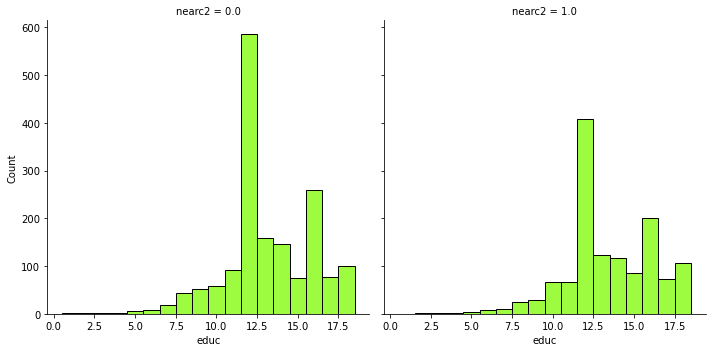

In [4]:
sns.displot(card, x = "educ", col = "nearc2", discrete=True, color = 
            "#7CFC00")

Observando los gráficos, se puede concluir que para la variable "educación", cuando nearc2 es igual a 0, la educación de las personas aumenta, a partir de los doce años de educación; esto en comparación de cuando nearc2 es igual a 1. Entonces, el número de personas que tendrán mayor número de años educativos alcanzados, serán mayor en tanto no se encuentren residiendo en zonas que tengan un college de "2 años" cercano. Por esa razón, cuando nearc2 es igual a 0, el gráfico arroga resultados mayores a cuando nearc2 es igual a 1. Además, se observa que la variable comienza a cobrar un mayor impacto a partir de los 12 años de educación alcanzada. Sin embargo, incluso antes de estos años, la variable educ ya presenta ciertas variaciones, siendo que se mantiene el patrón antes reconocido: cuando nearc2 es 0, los resultados son mayores a cuando es igual a 1. Por lo tanto, se podría hablar de una relación negativa entre ambas variables. 

#### - Grafique dos histogramas para la variable logaritmos de los ingresos lwage para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

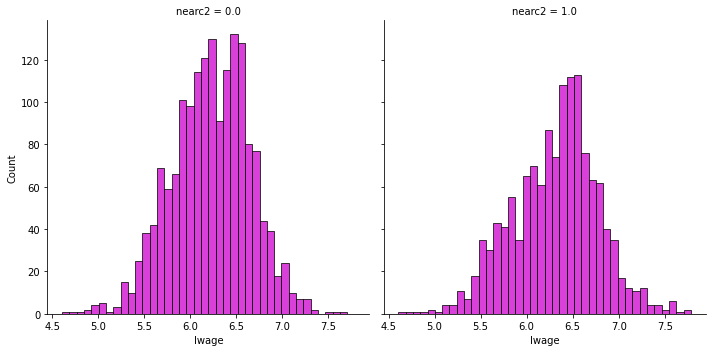

In [8]:
sns.displot(card, x="lwage", col = "nearc2", color = 
            "#CD00CD")

Para la variable lwge, la variación observada es menor, considerando que los gráficos, por como se puede observar, parecen más parecidos que en el caso anterior. Sin embargo, sí se puede observar cierta diferencia entre ambos gráficos, lo cual nos dice que será mayor la frecuencia de personas que obtendrán un mejor salario, mientras hayan vivido en zonas que no tenía un college de "2 años" cerca. Por lo tanto, se podría observar una relación negativa entre ambas variables.

### Regresiones


#### - Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [9]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        16:54:05   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En base a los resultados del OLS, se observa que por cada año adicional de estudios cursado, los ingresos de los sujetos aumentan en un aproximado de 7.1%. Asismismo, la experiencia también aumenta el ingreso de estos en un 3.4%, aproximadamente. 

Sin embargo, también se observan relaciones negativas. Por ejemplo, el hecho de ser de "raza" negra, perjudica al nivel de ingresos percibido, reduciendo este en un aproximado de 16.6%. De igual forma, la tasa de proximidad de las universidades también varía, siendo menor en el sur. Por lo tanto, como ya se estableció arriba, con los gráficos, mientras más proximidad a los colleges, mayores sus tasas de educación e ingresos. Entonces, en los resultados del OLS, se puede ver que el vivir en el sur afecta negativamente el nivel de ingresos, reduciéndolos en un aproximado de 13.1%. Por el contrario, el hecho de vivir en una zona metropolitana (smsa) afecta positivamente al nivel de ingresos, pues estos puede aumentar en un aproximado de 17.6%.  

Finalmente, se puede concluir que todas las variables aportan al modelo, por ende, son estadísticamente significativas, lo cual indica la existencia de una correlación y/o asociación con el nivel de ingresos. Esto se concluye en base a la observación de p-value, el cual, para todas las variables, resulta menor a 0.05. Adempas, el R2 ajustado determina que el modelo tiene un poder explicado de 30.4%, al momento de explicar las variaciones que la variable dependiente (nivel de ingresos) pueda presentar, según los cambios percibidos en las variables independientes. 

#### - Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 .

In [10]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)

In [11]:
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        17:00:24   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

#### - Compare los resultados encontrados usando IV2SLS con la primera regresión. ¿Cambió el coeficiente relacionado a educ , por qué?

En este caso, estimamos el 2SLS, en base a la variable instrumental **(nearc2: cercanía a college de 2 años)**. 

Observando estos datos, encontramos que por cada año adicional de estudios cursado, los ingresos de los sujetos aumentan en un aproximado de 36.1%, resultados mayores al anterior. Asimismo, el valor del F statictic excede 15, por lo tanto, no se puede hablar de que exista un problema de instrumento débil.

En ese sentido, se puede decir que la variable instrumental tiene resultado, por eso los cambios en los coeficientes de la variable "educación", pues, el incluir una variable como la **nearc2**, explica el real impacto que posee la educación en el nivel de ingresos percibido por los sujetos. Sin embargo, es preciso notar que la relación entre la educación y la variable nearc2 es de carácter negativo, es decir, mientras esta aumente, la educación va a disminuir. Esta observación la extraemos de las observaciones percibidas en los histogramas anteriormente elaborados. Esto nos dice que mientras estén cerca a estos colleges, sus posibilidades de alcanzar más años educación disminuye, especialmente a partir de los 12 años de educación alcanzados. No obstante, al momento de hablar del impacto que tiene cada año adicional de estudios cursado en los ingresos percibidos, el coeficiente aumenta, pues sí existe una relación entre el nivel de educación y los ingresos percibidos en el futuro, siendo que tienen una relación positiva. Por esa razón, mientras no hayan residido en zonas cercanas a este tipo de college, la frecuencia de personas que perciben un mayor número de años de educación, será mayor y eso permitirá un mayor nivel de ingresos percibido en el futuro. 